In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from kan import KAN, create_dataset

## Two-layer KAN

In [3]:
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=5000)

grids = np.array([3,5,10,20,50])

two_layer_train_rmse = []
two_layer_test_rmse = []

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=3, k=3, seed=0, noise_scale=1.0)
    else:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20)
    two_layer_train_rmse.append(results['train_loss'][-1].item())
    two_layer_test_rmse.append(results['test_loss'][-1].item())

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

| train_loss: 2.79e-02 | test_loss: 2.82e-02 | reg: 2.55e+01 | : 100%|█| 50/50 [00:11<00:00,  4.49it


saving model version 0.1
saving model version 0.2


| train_loss: 1.35e-02 | test_loss: 1.49e-02 | reg: 2.57e+01 | : 100%|█| 50/50 [00:10<00:00,  4.56it


saving model version 0.3
saving model version 0.4


| train_loss: 6.97e-03 | test_loss: 7.87e-03 | reg: 2.57e+01 | : 100%|█| 50/50 [00:12<00:00,  4.16it


saving model version 0.5
saving model version 0.6


| train_loss: 4.93e-03 | test_loss: 6.36e-03 | reg: 2.58e+01 | : 100%|█| 50/50 [00:14<00:00,  3.54it


saving model version 0.7
saving model version 0.8


| train_loss: 3.69e-03 | test_loss: 7.09e-03 | reg: 2.49e+01 | : 100%|█| 50/50 [00:27<00:00,  1.84it

saving model version 0.9


## Three-layer KAN

In [4]:
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=5000)

grids = np.array([3,5,10,20,50])

three_layer_train_rmse = []
three_layer_test_rmse = []

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0, noise_scale=1.0)
    else:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20)
    three_layer_train_rmse.append(results['train_loss'][-1].item())
    three_layer_test_rmse.append(results['test_loss'][-1].item())

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

| train_loss: 7.33e-03 | test_loss: 7.63e-03 | reg: 1.06e+01 | : 100%|█| 50/50 [00:14<00:00,  3.52it


saving model version 0.1
saving model version 0.2


| train_loss: 3.61e-03 | test_loss: 3.56e-03 | reg: 1.06e+01 | : 100%|█| 50/50 [00:13<00:00,  3.81it


saving model version 0.3
saving model version 0.4


| train_loss: 1.45e-03 | test_loss: 1.45e-03 | reg: 1.05e+01 | : 100%|█| 50/50 [00:13<00:00,  3.78it


saving model version 0.5
saving model version 0.6


| train_loss: 4.10e-04 | test_loss: 3.76e-04 | reg: 1.05e+01 | : 100%|█| 50/50 [00:13<00:00,  3.77it


saving model version 0.7
saving model version 0.8


| train_loss: 3.97e-05 | test_loss: 3.97e-05 | reg: 1.05e+01 | : 100%|█| 50/50 [00:11<00:00,  4.27it

saving model version 0.9


## Visualization of Training and Testing RMSE

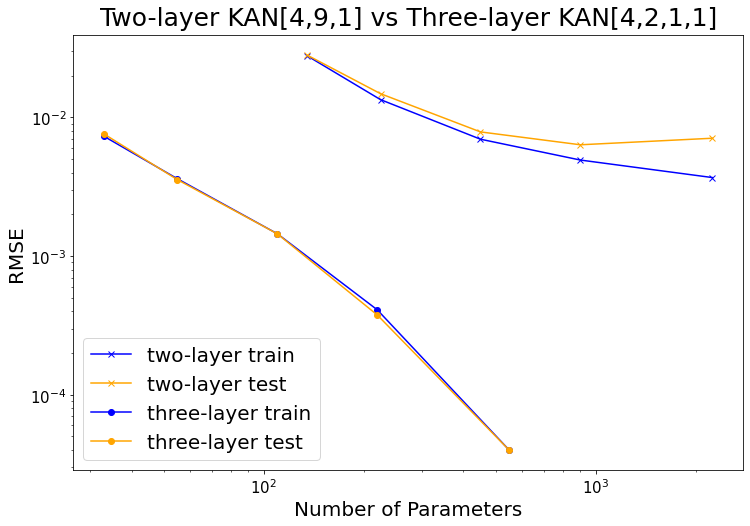

In [20]:
plt.figure(figsize=(12, 8))

two_layer_n_params = np.array(grids) * (4*9+9*1)
plt.plot(two_layer_n_params, two_layer_train_rmse, marker="x", color='blue')
plt.plot(two_layer_n_params, two_layer_test_rmse, marker="x", color='orange')

three_layer_n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(three_layer_n_params, three_layer_train_rmse, marker="o", color='blue')
plt.plot(three_layer_n_params, three_layer_test_rmse, marker="o", color='orange')

plt.legend(['two-layer train', 'two-layer test', 'three-layer train', 'three-layer test'], loc="lower left", fontsize=20)
plt.title('Two-layer KAN[4,9,1] vs Three-layer KAN[4,2,1,1]', fontsize=25, pad=10)
plt.xlabel('Number of Parameters', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.xscale('log')
plt.yscale('log')
plt.savefig('2_vs_3_layer.png')